In [183]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.stats import shapiro
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [94]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [101]:
data.shape

(299, 13)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [95]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [97]:
for i in data.columns:
    nan_counts = data[i].isna().sum()
    total = len(data[i])
    res = np.round(nan_counts/total,5)
    print('{0}% of missing value is found in {1} column'.format(res,i))

0.0% of missing value is found in age column
0.0% of missing value is found in anaemia column
0.0% of missing value is found in creatinine_phosphokinase column
0.0% of missing value is found in diabetes column
0.0% of missing value is found in ejection_fraction column
0.0% of missing value is found in high_blood_pressure column
0.0% of missing value is found in platelets column
0.0% of missing value is found in serum_creatinine column
0.0% of missing value is found in serum_sodium column
0.0% of missing value is found in sex column
0.0% of missing value is found in smoking column
0.0% of missing value is found in time column
0.0% of missing value is found in DEATH_EVENT column


In [98]:
l=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
for i in l:
    px.box(x = data[i],title=i.upper()).show()
    
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    
    if data[(data[i]>=upper_fence) | (data[i]<=lower_fence)].shape[0]>0:
        for k,d in data.iterrows():
            if d[i]>=upper_fence:
                data.at[k,i] = upper_fence
            if d[i]<=lower_fence:
                data.at[k,i] = lower_fence
        print("Outliers detected and removed successfully!!")
        px.box(x = data[i],title="{} without Outliers".format(i).upper()).show()
    else:
        print("No Outliers detected!!")

No Outliers detected!!


Outliers detected and removed successfully!!


Outliers detected and removed successfully!!


Outliers detected and removed successfully!!


Outliers detected and removed successfully!!


Outliers detected and removed successfully!!


No Outliers detected!!


In [99]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.15,125,0,0,8,1


In [105]:
categorical_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

In [106]:
for col in categorical_col:
    data[col] = data[col].astype("category")

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(3), int64(5)
memory usage:

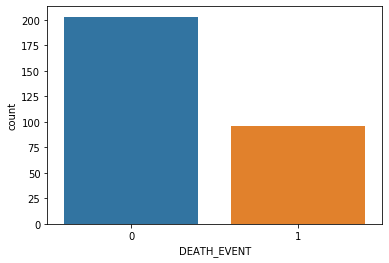

In [108]:
sns.countplot(data['DEATH_EVENT'])

In [109]:
print("Select through the drop down menu to view related pie charts.")
fig = go.Figure()
col_list = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for col in col_list:
    temp = dict(data[col].value_counts())
    fig.add_trace(
      go.Pie(
          labels = list(temp.keys()),
          values =  list(temp.values())
      )
  )

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'Anaemia',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False]}, 
                          {'title': 'Anaemia',
                           'showlegend':True}]),
             dict(label = 'Diabetes',
                  method = 'update',
                  args = [{'visible': [False, True, False, False, False]},
                          {'title': 'Diabetes',
                           'showlegend':True}]),
             dict(label = 'High Blood Pressure',
                  method = 'update',
                  args = [{'visible': [False,False, True, False, False]},
                          {'title': 'High Blood Pressure',
                           'showlegend':True}]),
             dict(label = 'Sex',
                  method = 'update',
                  args = [{'visible': [False, False,False,True, False]},
                          {'title': 'Sex',
                           'showlegend':True}]),
             dict(label = 'Smoking',
                  method = 'update',
                  args = [{'visible': [False,False, False, False, True]},
                          {'title': 'Smoking',
                           'showlegend':True}]),
            ])
        )
    ])

fig.show()

Select through the drop down menu to view related pie charts.


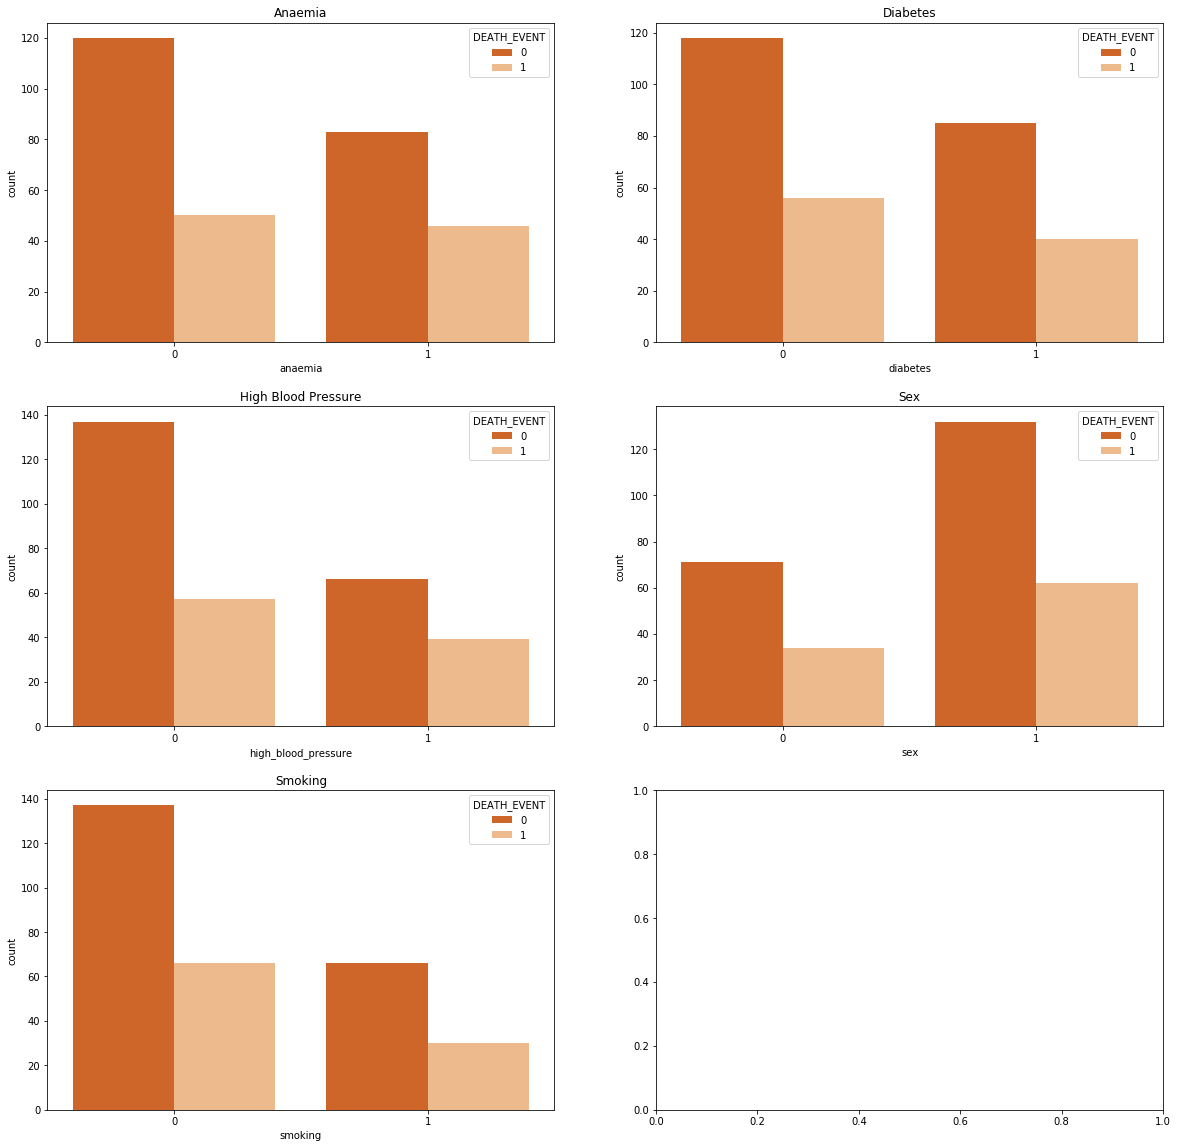

In [116]:
fig, axis = plt.subplots(3, 2, figsize=(20,20))
axis[0,0].set_title('Anaemia')
axis[0,1].set_title('Diabetes')
axis[1,0].set_title('High Blood Pressure')
axis[1,1].set_title('Sex')
axis[2,0].set_title('Smoking')

sns.countplot(x = 'anaemia', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[0,0])
sns.countplot(x = 'diabetes', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[0,1])
sns.countplot(x = 'high_blood_pressure', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[1,0])
sns.countplot(x = 'sex', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[1,1])
sns.countplot(x = 'smoking', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[2,0])

plt.show()

Text(0, 0.5, 'Percentage of death')


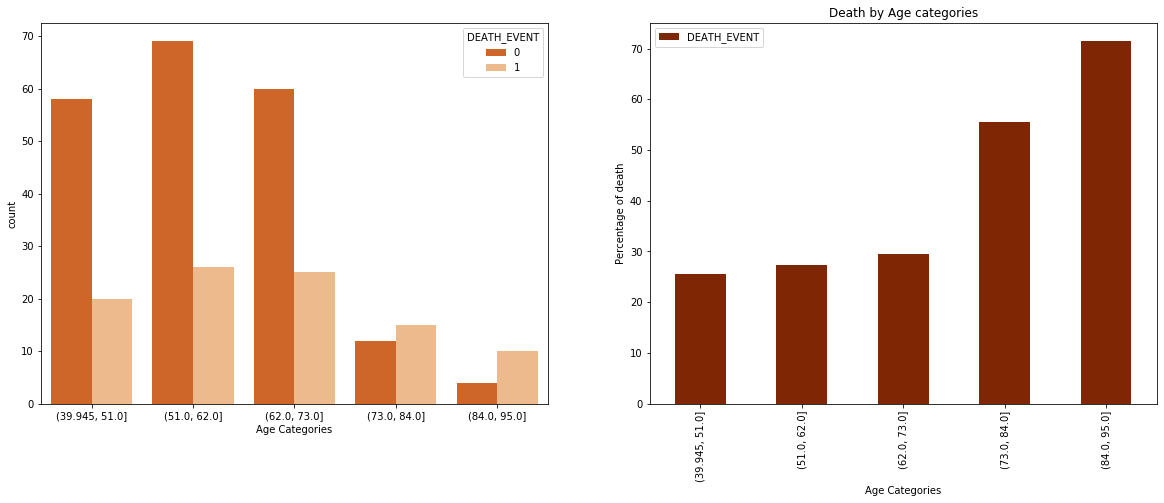

In [142]:
data['Age Categories'] = pd.cut(data['age'],5)
fig, axis = plt.subplots(1, 2, figsize=(20,7))
sns.countplot(x = 'Age Categories', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[0])
print((data[['Age Categories','DEATH_EVENT']].groupby('Age Categories').mean()*100)
      .plot(kind='bar',title="Death by Age categories",colormap="Oranges_r",ax=axis[1])
     .set_ylabel("Percentage of death"))
plt.show()

Text(0, 0.5, 'Percentage of death')


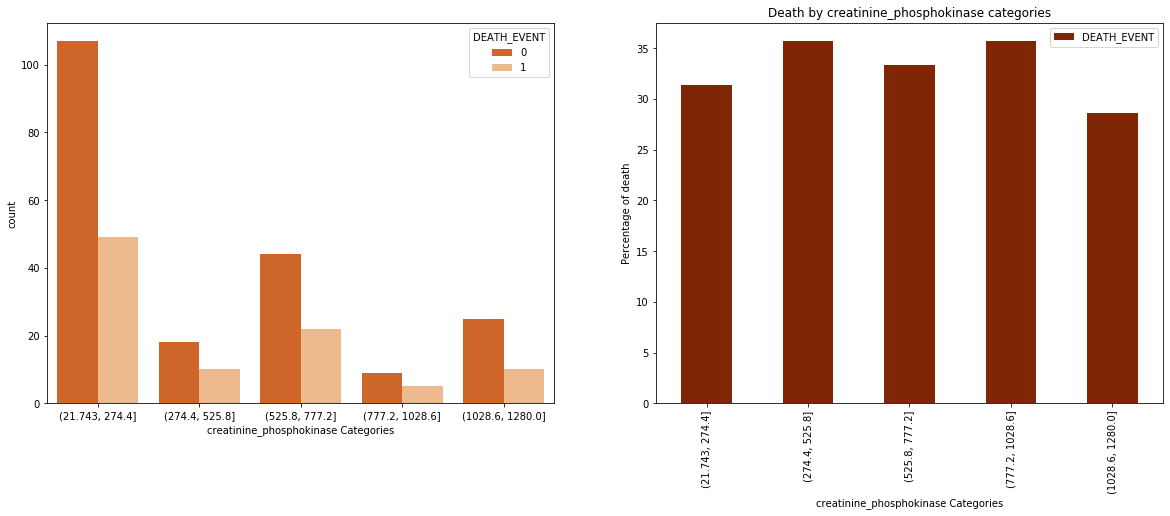

In [124]:
data['creatinine_phosphokinase Categories'] = pd.cut(data['creatinine_phosphokinase'],5)
fig, axis = plt.subplots(1, 2, figsize=(20,7))
sns.countplot(x = 'creatinine_phosphokinase Categories', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[0])
print((data[['creatinine_phosphokinase Categories','DEATH_EVENT']].groupby('creatinine_phosphokinase Categories').mean()*100)
      .plot(kind='bar',title="Death by creatinine_phosphokinase categories",colormap="Oranges_r",ax=axis[1])
     .set_ylabel("Percentage of death"))
plt.show()

Text(0, 0.5, 'Percentage of death')


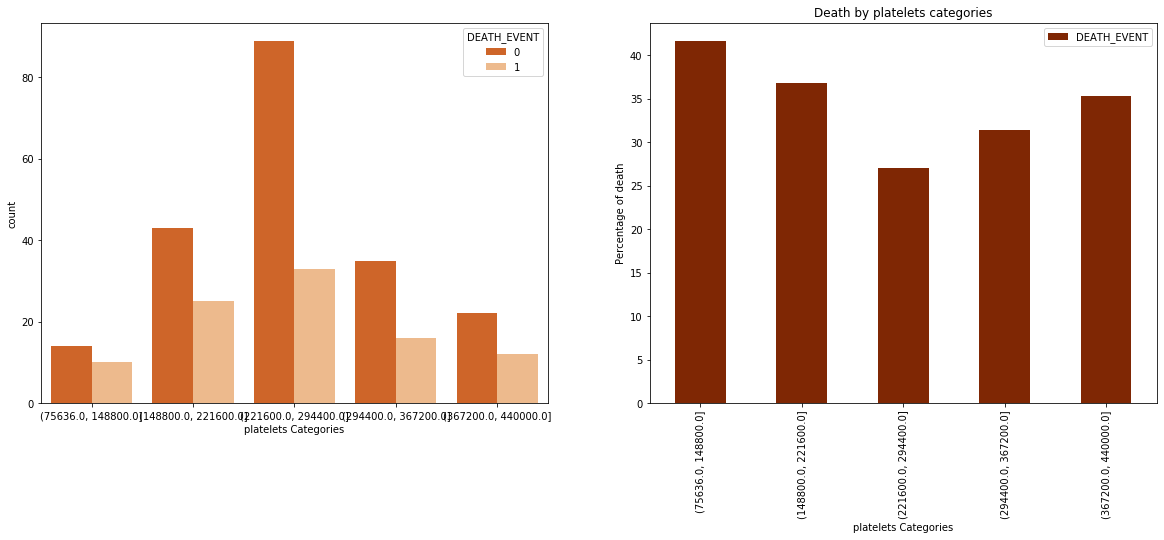

In [145]:
data['platelets Categories'] = pd.cut(data['platelets'],5)
fig, axis = plt.subplots(1, 2, figsize=(20,7))
sns.countplot(x = 'platelets Categories', hue = 'DEATH_EVENT', data = data, palette = 'Oranges_r',ax=axis[0])
print((data[['platelets Categories','DEATH_EVENT']].groupby('platelets Categories').mean()*100)
      .plot(kind='bar',title="Death by platelets categories",colormap="Oranges_r",ax=axis[1])
     .set_ylabel("Percentage of death"))
plt.show()

In [146]:
print("Contingency Table =>")
contingency= pd.crosstab(data['high_blood_pressure'], data['DEATH_EVENT']) 
contingency

Contingency Table =>


DEATH_EVENT,0,1
high_blood_pressure,,
0,137,57
1,66,39


In [147]:
print("P-value =>")
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print(p)
alpha = 0.05
print("p value is " ,p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value =>
0.21410341199416902
p value is  0.21410341199416902
Independent (H0 holds true)


In [148]:
print("Contingency Table =>")
contingency= pd.crosstab(data['smoking'], data['DEATH_EVENT']) 
contingency

Contingency Table =>


DEATH_EVENT,0,1
smoking,,
0,137,66
1,66,30


In [149]:
print("P-value =>")
c, p, dof, expected = chi2_contingency(contingency) 
# Print the p-value
print(p)
alpha = 0.05
print("p value is " ,p)
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

P-value =>
0.9317652998235507
p value is  0.9317652998235507
Independent (H0 holds true)


In [155]:
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Age Categories,creatinine_phosphokinase Categories,platelets Categories
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,"(73.0, 84.0]","(525.8, 777.2]","(221600.0, 294400.0]"
1,55.0,0,1280,0,38,0,263358.03,1.1,136,1,0,6,1,"(51.0, 62.0]","(1028.6, 1280.0]","(221600.0, 294400.0]"


In [170]:
X = data.drop(['DEATH_EVENT','Age Categories','creatinine_phosphokinase Categories','platelets Categories'],axis=1)
y = data['DEATH_EVENT']

In [171]:
predictors = data.head(0)
selector = SelectKBest(chi2,k=5)
sf_fit = selector.fit(X,y)

In [172]:
c=[]
sf=[]
for i in range(len(sf_fit.scores_)):
    print(X.columns[i],":",sf_fit.scores_[i])
    c.append(X.columns[i])
    sf.append(sf_fit.scores_[i])

age : 44.619454569378306
anaemia : 0.7465934114891604
creatinine_phosphokinase : 4.213257191049663
diabetes : 0.0006568144499178924
ejection_fraction : 78.42169384091324
high_blood_pressure : 1.221538529204786
platelets : 14867.621456310466
serum_creatinine : 7.055536496390369
serum_sodium : 1.4684417353546453
sex : 0.001956265975995817
smoking : 0.032346828817734236
time : 3826.8926612912724


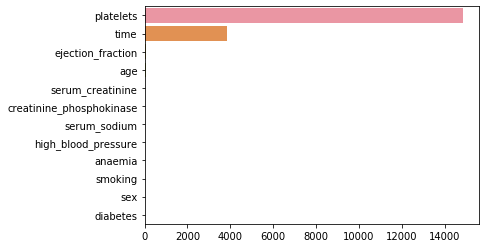

In [173]:
sf=pd.Series(sf)
sf.index=X.columns
sf.index
sf=sf.sort_values(ascending=False)
sns.barplot(y=sf.index,x=sf)

In [174]:
X = X.drop(['diabetes','smoking','anaemia'],axis=1)

In [175]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time
0,75.0,582,20,1,265000.00,1.90,130,1,4
1,55.0,1280,38,0,263358.03,1.10,136,1,6
2,65.0,146,20,0,162000.00,1.30,129,1,7
3,50.0,111,20,0,210000.00,1.90,137,1,7
4,65.0,160,20,0,327000.00,2.15,125,0,8


In [176]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=30))

cross_val = cross_val_score(pipeline,X,y,cv=10)

print('Cross Validation Score : ',cross_val.mean()*100)

Cross Validation Score :  76.5632183908046


In [177]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [178]:
scaler = StandardScaler()

In [179]:
x_train['age'] = scaler.fit_transform(np.array(x_train['age']).reshape(-1,1))
x_test['age'] = scaler.transform(np.array(x_test['age']).reshape(-1,1))

x_train['creatinine_phosphokinase'] = scaler.fit_transform(np.array(x_train['creatinine_phosphokinase']).reshape(-1,1))
x_test['creatinine_phosphokinase'] = scaler.transform(np.array(x_test['creatinine_phosphokinase']).reshape(-1,1))

x_train['ejection_fraction'] = scaler.fit_transform(np.array(x_train['ejection_fraction']).reshape(-1,1))
x_test['ejection_fraction'] = scaler.transform(np.array(x_test['ejection_fraction']).reshape(-1,1))

x_train['platelets'] = scaler.fit_transform(np.array(x_train['platelets']).reshape(-1,1))
x_test['platelets'] = scaler.transform(np.array(x_test['platelets']).reshape(-1,1))

x_train['serum_creatinine'] = scaler.fit_transform(np.array(x_train['serum_creatinine']).reshape(-1,1))
x_test['serum_creatinine'] = scaler.transform(np.array(x_test['serum_creatinine']).reshape(-1,1))

x_train['serum_sodium'] = scaler.fit_transform(np.array(x_train['serum_sodium']).reshape(-1,1))
x_test['serum_sodium'] = scaler.transform(np.array(x_test['serum_sodium']).reshape(-1,1))

x_train['time'] = scaler.fit_transform(np.array(x_train['time']).reshape(-1,1))
x_test['time'] = scaler.transform(np.array(x_test['time']).reshape(-1,1))

Accuracy of Decision Tree Classifier =>  75.0 %
Precision score of Decision Tree Classifier => 70.0
Recall score of Decision Tree Classifier => 60.87
f1 score of Decision Tree Classifier => 65.12

Confusion Matrix => 


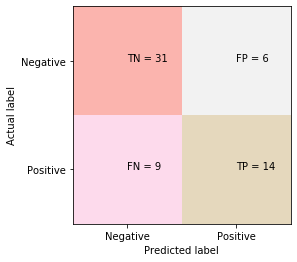

ROC Curve =>


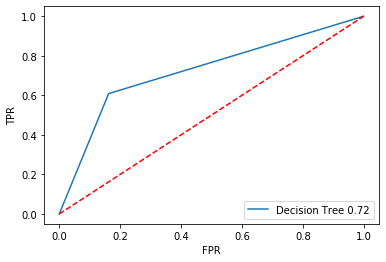

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
prediction = dtc.predict(x_test)
print("Accuracy of Decision Tree Classifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of Decision Tree Classifier =>",np.round(precision,2))    
dtc_precision = np.round(precision,2)


recall = recall_score(y_test,prediction)*100
print("Recall score of Decision Tree Classifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of Decision Tree Classifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")

cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")
fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="Decision Tree {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

Accuracy of Random Forest Classifier =>  86.67 %
Precision score of Random Forest Classifier => 89.47
Recall score of Random Forest Classifier => 73.91
f1 score of Random Forest Classifier => 80.95

Confusion Matrix => 


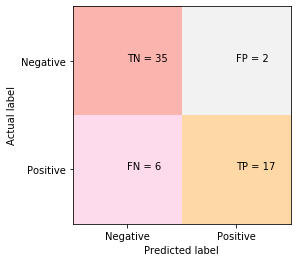

ROC Curve =>


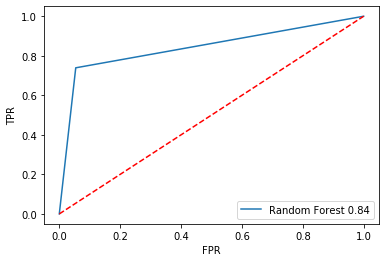

In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)
print("Accuracy of Random Forest Classifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of Random Forest Classifier =>",np.round(precision,2))  

rfc_precision = np.round(precision,2)

recall = recall_score(y_test,prediction)*100
print("Recall score of Random Forest Classifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of Random Forest Classifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")
cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")

fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="Random Forest {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

Accuracy of GradientBoostingClassifier =>  85.0 %
Precision score of GradientBoostingClassifier => 93.75
Recall score of GradientBoostingClassifier => 65.22
f1 score of GradientBoostingClassifier => 76.92

Confusion Matrix => 


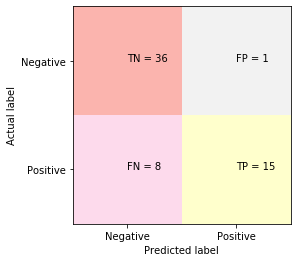

ROC Curve =>


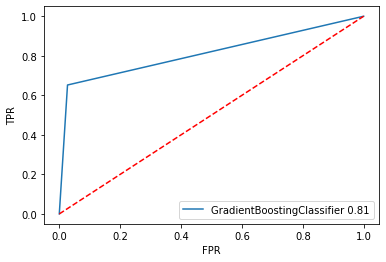

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,max_depth=3)
gbc.fit(x_train, y_train)
prediction = gbc.predict(x_test)
print("Accuracy of GradientBoostingClassifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of GradientBoostingClassifier =>",np.round(precision,2))    
gbc_precision = np.round(precision,2)


recall = recall_score(y_test,prediction)*100
print("Recall score of GradientBoostingClassifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of GradientBoostingClassifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")

cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")
fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="GradientBoostingClassifier {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

Accuracy of GradientBoostingClassifier =>  85.0 %
Precision score of GradientBoostingClassifier => 93.75
Recall score of GradientBoostingClassifier => 65.22
f1 score of GradientBoostingClassifier => 76.92

Confusion Matrix => 


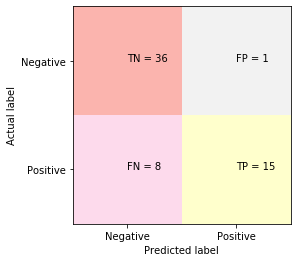

ROC Curve =>


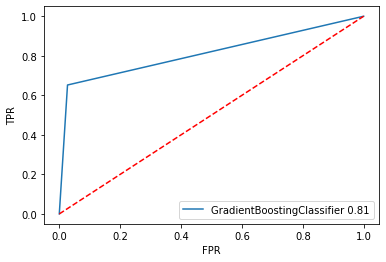

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

param={
    "n_estimators" : [50,100,150,200,250,300],
    "learning_rate" : [0.01,0.1,1,10,100],
    "max_depth" : [1,3,5]
}

gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,max_depth=3)

grid = GridSearchCV(gbc,param_grid=param,cv=5)
grid.fit(x_train, y_train)
prediction = grid.predict(x_test)
print("Accuracy of GradientBoostingClassifier => ", np.round(accuracy_score(y_test,prediction)*100,2),"%")

precision = (precision_score(y_test,prediction))*100
print("Precision score of GradientBoostingClassifier =>",np.round(precision,2))    
grid_precision = np.round(precision,2)


recall = recall_score(y_test,prediction)*100
print("Recall score of GradientBoostingClassifier =>",np.round(recall,2))    
f1 = f1_score(y_test,prediction)*100
print("f1 score of GradientBoostingClassifier =>",np.round(f1,2))     
print("")
print("Confusion Matrix => ")

cm = confusion_matrix(y_test,prediction)
plt.clf()
plt.imshow(cm,cmap=plt.cm.Pastel1_r)
classname=['Negative','Positive']
tick_marks = np.arange(len(classname))
plt.xticks(tick_marks,classname)
plt.yticks(tick_marks,classname)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

print("ROC Curve =>")
fpr, tpr, threshold = roc_curve(y_test,prediction)
lr_roc_auc =roc_auc_score(y_test,prediction)
plt.figure()
plt.plot(fpr,tpr,label="GradientBoostingClassifier {}".format(round(lr_roc_auc,2)))
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

In [188]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [190]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,time
0,75.0,582,20,1,265000.00,1.90,130,1,4
1,55.0,1280,38,0,263358.03,1.10,136,1,6
2,65.0,146,20,0,162000.00,1.30,129,1,7
3,50.0,111,20,0,210000.00,1.90,137,1,7
4,65.0,160,20,0,327000.00,2.15,125,0,8
